In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.stats as stats

In [2]:
# Replace = True to keep the previous random value means that we don't take it out of population
for i in range(20):
    die = np.random.choice(range(1, 7), size=2, replace=True)
    print(die, end=' ')

[1 2] [4 1] [4 1] [5 6] [1 6] [5 4] [6 1] [3 4] [3 4] [1 3] [1 1] [2 3] [2 3] [5 1] [3 3] [1 1] [6 2] [4 3] [1 6] [4 3] 

In [3]:
x, n, p = 12, 15, 0.7
Binomial = stats.binom.pmf(x, n, p)
print(Binomial)

0.17004021326428503


In [4]:
@widgets.interact(
    coins=widgets.IntSlider(min=1, max=20, step=1, value=10, description='Coins: '),
    x=widgets.IntSlider(min=0, max=20, step=1, description='x: '),
)
def draw_coins(coins, x):
    probability = []
    for i in range(coins+1):
        probability.append(stats.binom.pmf(i, coins, 0.5))
    
    print(f'Probability of getting {x} heads over {coins}: ', end='')
    try:
        print(round(probability[x], 5)) 
    except:
        print(0)
        
    plt.figure(figsize=(8, 4), label=f'Probability of getting head when drawing {coins} coin(s)')
    plt.bar(range(coins+1), probability[0:coins+1], color='brown')
    plt.xlabel('Head')
    plt.ylabel('Probability')
    plt.xticks(range(coins+1))
    plt.grid(color='red')
    plt.show()

interactive(children=(IntSlider(value=10, description='Coins: ', max=20, min=1), IntSlider(value=0, descriptio…

interactive(children=(IntSlider(value=10, description='Coins: ', max=20, min=1), IntRangeSlider(value=(4, 6), …

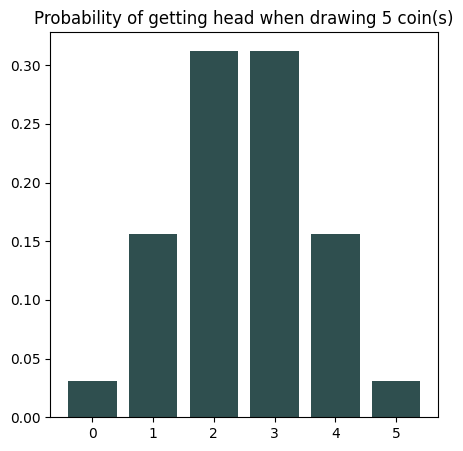

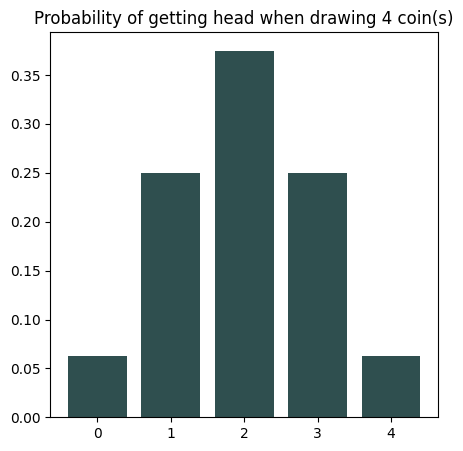

In [5]:
@widgets.interact(
    x = widgets.IntRangeSlider(min=0, max=20, value=[4, 6], description='Head: '), 
    coins = widgets.IntSlider(min=1, max=20, step=1, value=10, description='Coins: '),
    vertical_line = widgets.Checkbox(description='Vertical line')
)
def pmf_coins(coins, x, vertical_line):
    probability = []
    
    for i in range(coins+1):
        probability.append(stats.binom.pmf(i, coins, 0.5))
    
    PMF = stats.binom.cdf(x[1], coins, 0.5) - stats.binom.cdf(x[0]-1, coins, 0.5)
    
    print(f'P({x[0]} <= X <= {x[1]}) = {round(PMF, 5)}')
    
    plt.figure(figsize=(5, 5))
    plt.title(f'Probability of getting head when drawing {coins} coin(s)')
    plt.bar(range(coins+1), probability[0:coins+1], color='#2f4f4f')
    plt.bar(range(x[0], x[1]+1), probability[x[0]:x[1]+1], color='g')
    
    plt.xlabel('Head')
    plt.ylabel('Probability')
    plt.xticks(range(coins+1))
    
    if vertical_line:
        plt.axvline(x[0]-0.5)
        plt.axvline(x[1]+0.5)
    plt.show()
    